# Coordinate Descent to solve Lasso Regression on a Normally Distributed Synthetic Data

In [105]:
import numpy as np
import pandas as pd
from scipy import sparse
import matplotlib.pyplot as plt
import random

## Generating the synthetic data

In [106]:
#Q 4.3.1
#Sampling from std normal distribution
d = 80
n = 250
k = 10

X = np.random.standard_normal(size=(d,n))
b = 0
W = np.zeros(d)
for i in range(k):
    t = random.uniform(0,1)
    if t >= 0.5:
        W[i] = 10
    else:
        W[i] = -10
        
# W[:k] = 10
eps = np.random.normal(0, 1, size=(n))
Y = X.T.dot(W) + b + eps

#creating sparse matrix
X = sparse.csr_matrix(X)
lambda_max = 2*np.linalg.norm(X.dot(Y - np.mean(Y)), ord=np.inf)
ak = 2*np.sum(i*i for i in X.T.toarray())

In [1]:
def coordinate_descent(lambda_max, Y, X, W, b, K):
    lambdavalues = []
    lossvalues = []
    nonzeroes = []
    precisionVal = []
    recallVal = []
    
    
    #set convergence condition
    for iteration in range(10):
        #STEP 1: Computing residual vector r (4.1.1)
        r = Y - X.T*W - b

        #STEP 2: Update b (4.1.2)
        bOld = b
        b = (1.0/n)*(r+b).sum()

        #STEP 3: Update r(4.1.3)
        r = r + bOld - b
        for k in range(d):
            #STEP 4: Calculate ck (4.1.4) 
            xik = X[k]

            t = xik.T*W[k]
            t = t.toarray().reshape(n)

            ck = 2*xik*(r+t)
            ck =  ck.item(0)

            #STEP 5: Update wk
            Wo = W[k]
            if ck < -lambda_max:
                W[k] = (ck + lambda_max)/ak[k]
            elif -lambda_max <= ck <= lambda_max:
                W[k] = 0
            elif ck > lambda_max:
                W[k] = (ck - lambda_max)/ak[k]

            #STEP 6: Update r (4.1.5)        
            r = r.reshape(n,1) + X[k].T*(Wo-W[k])
            r = np.squeeze(np.asarray(r))



        #Loss
        t1 = (X.T*W+b-Y)
        t11 = np.square(t1)
        t2 = np.sum(t11)
        loss = t2 + lambda_max*(np.sum(np.absolute(W)))
        print "Loss: ",loss
        lossvalues.append(loss)
        #lambda values for graph
        lambdavalues.append(lambda_max)
        lambda_max = lambda_max/2
        nonzeroes.append(np.count_nonzero(W))
        
        #precision
        if np.count_nonzero(W) != 0:
            precisionVal.append(np.count_nonzero(W[:K])*1./float(np.count_nonzero(W)))
        else:
            precisionVal.append(1)
        
        #recall
        recallVal.append(np.count_nonzero(W[:K])/float(K))
            
    return lambdavalues, lossvalues, nonzeroes, W, b, precisionVal, recallVal
            
def rmse(P, A):
    return np.sqrt(((P-A)**2).mean())

In [108]:
# r = Y - X.T*W - b
lambdavalues, lossvalues, nonzeroes, W_f, b_f, precisionVal, recallVal = coordinate_descent(lambda_max, Y, X, W, b, k)

Loss:  217368.20569311507
Loss:  180873.53808206896
Loss:  110211.40282046895
Loss:  60058.621381204895
Loss:  31359.790603699126
Loss:  16106.805410281055
Loss:  8254.472336850637
Loss:  4267.768954957859
Loss:  2247.9560963995405
Loss:  1224.6889881252976


## Plot of Precision and Recall vs Lambda

Sparsity Pattern:  57
Precision:  0.175438596491
Recall:  1


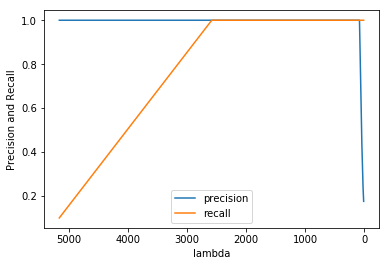

In [109]:
print "Sparsity Pattern: ", np.count_nonzero(W_f) #originally was 10
print "Precision: ", np.count_nonzero(W_f[:k])*1./np.count_nonzero(W_f)
print "Recall: ",np.count_nonzero(W_f[:k])/k

plt.plot(lambdavalues, precisionVal, label="precision")
plt.plot(lambdavalues, recallVal, label="recall")
plt.xlabel("lambda")
plt.ylabel("Precision and Recall")
plt.legend()

axis = plt.gca()
axis.set_xlim(axis.get_xlim()[::-1])

plt.show()

In [135]:
#Q 4.3.2
#Sampling from std normal distribution
d = 80
n = 250
k = 10

X = np.random.normal(0, 10, size=(d,n))
# b = 0
# W = np.zeros(d)
# for i in range(k):
#     t = random.uniform(0,1)
#     if t >= 0.5:
#         W[i] = 10
#     else:
#         W[i] = -10
        
# W[:k] = 10
eps = np.random.normal(0, 10, size=(n))
Y = X.T.dot(W_f) + b + eps

#creating sparse matrix
X = sparse.csr_matrix(X)
# lambda_max = 2*np.linalg.norm(X.dot(Y - np.mean(Y)), ord=np.inf)
lambda_max = 5
ak = 2*np.sum(i*i for i in X.T.toarray())

In [136]:
def coordinate_descent2(lambda_max, Y, X, W, b, K):
    lambdavalues = []
    lossvalues = []
    nonzeroes = []
    precisionVal = []
    recallVal = []
    trainRMSE = []
    
    #set convergence condition
    for iteration in range(10):
        #STEP 1: Computing residual vector r (4.1.1)
        r = Y - X.T*W - b

        #STEP 2: Update b (4.1.2)
        bOld = b
        b = (1.0/n)*(r+b).sum()

        #STEP 3: Update r(4.1.3)
        r = r + bOld - b
        for k in range(d):
            #STEP 4: Calculate ck (4.1.4) 
            xik = X[k]

            t = xik.T*W[k]
            t = t.toarray().reshape(n)

            ck = 2*xik*(r+t)
            ck =  ck.item(0)

            #STEP 5: Update wk
            Wo = W[k]
            if ck < -lambda_max:
                W[k] = (ck + lambda_max)/ak[k]
            elif -lambda_max <= ck <= lambda_max:
                W[k] = 0
            elif ck > lambda_max:
                W[k] = (ck - lambda_max)/ak[k]

            #STEP 6: Update r (4.1.5)        
            r = r.reshape(n,1) + X[k].T*(Wo-W[k])
            r = np.squeeze(np.asarray(r))


        
        #Loss
        t1 = (X.T*W+b-Y)
        t11 = np.square(t1)
        t2 = np.sum(t11)
        loss = t2 + lambda_max*(np.sum(np.absolute(W)))
        print "Loss: ",loss
        lossvalues.append(loss)
        #lambda values for gramax/2
        nonzeroes.append(np.count_nonzero(W))
        
        #collecting rmse training values for graph
        trmse = rmse(X.T*W+b, Y)
        trainRMSE.append(trmse)
        print "RMSE:", trmse
        
        #precision
        if np.count_nonzero(W) != 0:
            precisionVal.append(np.count_nonzero(W[:K])*1./float(np.count_nonzero(W)))
        else:
            precisionVal.append(1)
        
        #recall
        recallVal.append(np.count_nonzero(W[:K])/float(K))
            
    return trainRMSE, lossvalues, nonzeroes, W, b, precisionVal, recallVal
            
def rmse(P, A):
    return np.sqrt(((P-A)**2).mean())

# def predict()


trainRMSE, lossvalues, nonzeroes, W_f, b_f, precisionVal2, recallVal2 = coordinate_descent2(lambda_max, Y, X, W_f, b_f, k)

In [138]:
print precisionVal, precisionVal2
print recallVal, recallVal2

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.43478260869565216, 0.23809523809523808, 0.17543859649122806] [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]
[0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


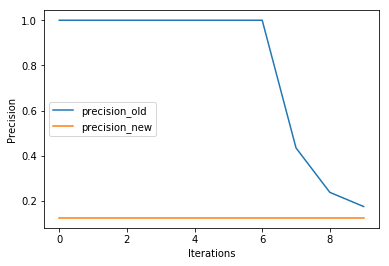

In [139]:
plt.plot(precisionVal, label="precision_old")
plt.plot(precisionVal2, label="precision_new")
plt.xlabel("Iterations")
plt.ylabel("Precision")
plt.legend()
plt.show()
#We can see that once we train on sigma=1 and get optimal lambda value, then the model 
#gives almost same precision for different gaussian noise (sigma = 10)

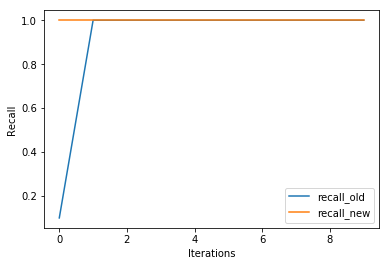

In [140]:
plt.plot(recallVal, label="recall_old")
plt.plot(recallVal2, label="recall_new")
plt.xlabel("Iterations")
plt.ylabel("Recall")
plt.legend()
plt.show()
#We can see that once we train on sigma=1 and get optimal lambda value, then the model 
#gives almost same recall for different gaussian noise (sigma = 10)